In [11]:
from lolviz import *

In [52]:
class Node:

	def __init__(self, val):
		self.val = val
		self.neigh = []
	
	def add(self, target_node):
		return self.neigh.append(target_node)

# Graph representation

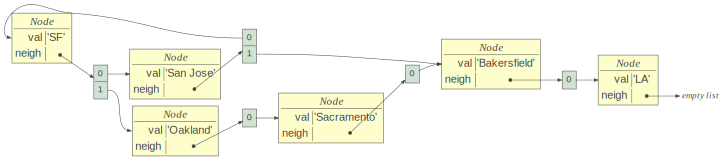

In [53]:
sf, la, sac, oak, baker, sj = Node("SF"), Node("LA"),  Node("Sacramento"), Node("Oakland"), Node("Bakersfield"), Node("San Jose")
sf.add(sj)
sj.add(sf)
sj.add(baker)
sf.add(oak)
oak.add(sac)
sac.add(baker)
baker.add(la)

objviz(sf)

# Breadth First Search (queue)

- Find shortest path in simple graph (edge = 1)

In [54]:
def bfs_order(root):

	if not root: return []
	if not isinstance(root, Node): return []

	from collections import deque

	# we can use visited as set and append to results to mantain
	# original level order 
	queue, results, visited = deque([root]), [], {root.val}

	while queue:

		node = queue.popleft()
		# 如果在出列的地方加进visited会导致重复计算
		results.append(node.val)

		for neigh_node in node.neigh:
			if neigh_node.val not in visited: 
				queue.append(neigh_node)
				# results.append(neigh_node.val)
				# 一定一定要记住要在入列的时候加进visited set里
				visited.add(neigh_node.val)
		
	return results


def bfs_no_order(root):

	if not root: return []
	if not isinstance(root, Node): return []

	from collections import deque

	# we don't need visited set if we don't feel 
	# the order of the result matters
	queue, results= deque([root]), {root.val}

	while queue:

		node = queue.popleft()

		for neigh_node in node.neigh:
			if neigh_node.val not in results: 
				queue.append(neigh_node)
				results.add(neigh_node.val)
		
	return results
				

In [55]:
bfs_order(sf)

['SF', 'San Jose', 'Oakland', 'Bakersfield', 'Sacramento', 'LA']

In [56]:
bfs_no_order(sf)

{'Bakersfield', 'LA', 'Oakland', 'SF', 'Sacramento', 'San Jose'}